In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import os

# _FOLDER = "/home/ac1jjgg/MOGP_GPyTorch/FiveCancersDataSet/"
_FOLDER = "/home/juanjo/Work_Postdoc/my_codes_postdoc/GPy_Models/Codes_For_GDSC1_ANOVA/"
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
drug_name = "1036"
df_Feature_Names_Melanoma = pd.read_csv(_FOLDER + "Best_Model_Drug"+drug_name+"_MelanomaGDSC1_GPy_ANOVA_ExactMOGP_ProdKern/Name_Features_ANOVA.csv")

In [66]:
List_Names_Melanoma = list(df_Feature_Names_Melanoma.values[:,1])

In [67]:
#List_Names_Melanoma[12]='        loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.'
List_Names_Melanoma

['ARID1A_mut',
 'ARID2_mut',
 'BRAF_mut',
 'CDKN2A_mut',
 'EZH2_mut',
 'MECOM_mut',
 'NF1_mut',
 'NRAS_mut',
 'PLCB1_mut',
 'PTEN_mut',
 'TP53_mut',
 'loss.cnaSKCM3',
 'loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.',
 'loss.cnaSKCM5..PAX5.',
 'loss.cnaSKCM9',
 'gain.cnaSKCM12..KRAS.',
 'gain.cnaSKCM21..FOXP1.MITF.',
 'loss.cnaSKCM22',
 'loss.cnaSKCM23',
 'loss.cnaSKCM24..loss.cnaSKCM25',
 'loss.cnaSKCM26',
 'loss.cnaSKCM27..CASP1.',
 'loss.cnaSKCM28',
 'loss.cnaSKCM30']

In [68]:
#List_Names_Melanoma[14]
#np.where(df_Feature_Names_Melanoma=="BRAF_mut")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN65")
np.where(df_Feature_Names_Melanoma=="BRAF_mut")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN30 (LARP4B)")

(array([2]), array([1]))

In [69]:
if drug_name == "1036":
    which_MOGPmodel = "m946"  #best: mXX; 
    N = 50 #40
elif drug_name == "1061":
    which_MOGPmodel = "m505"  #best: mXX; 
    N = 35
elif drug_name == "1373":
    which_MOGPmodel = "m221"  #best: mXX; 
    N = 39

(50, 24)


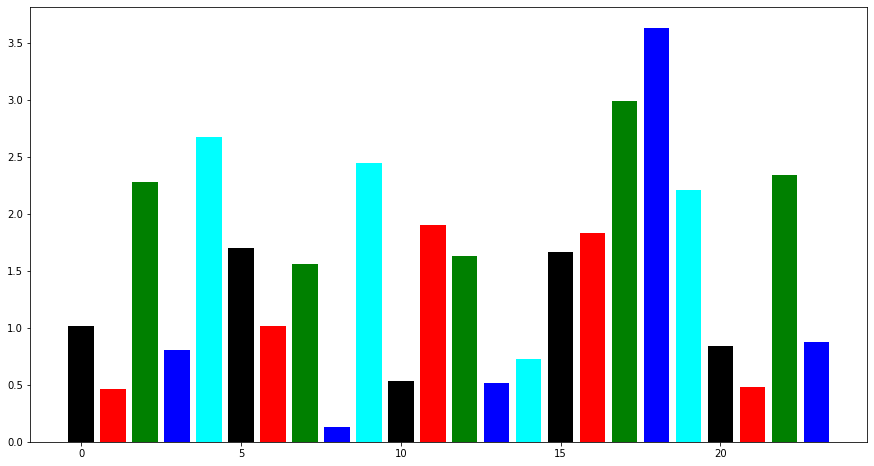

In [72]:
Pfeatures = df_Feature_Names_Melanoma.shape[0]
df_KLRelevance_Mtx_MOGP = pd.read_csv(_FOLDER+'Best_Model_Drug'+drug_name+'_MelanomaGDSC1_GPy_ANOVA_ExactMOGP_ProdKern/Relevance_Drug'+drug_name+'_MelanomaGDSC1_ANOVA_ToPredict_MelanomaGDSC2_ExactMOGP_'+which_MOGPmodel+'.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted_MOGP = df_KLRelevance_Mtx_MOGP.sort_values(by=['col0'])
KL_Relevance_MOGP = df_sorted_MOGP.values
KL_Relevance_MOGP = KL_Relevance_MOGP[:,1:].T  #We getrid of first index position
print(KL_Relevance_MOGP.shape)
KL_p_MOGP = np.mean(KL_Relevance_MOGP,0)
plt.figure(figsize = (15,8))
plt.bar(np.arange(0,Pfeatures),KL_p_MOGP,color=['black', 'red', 'green', 'blue', 'cyan'])#/KL_p_MOGP.max())
#plt.plot(np.arange(0,Pfeatures),KL_p_MOGP/KL_p_MOGP.max(),'x')

df_KLR_With_Column_Names_MOGP = pd.DataFrame(KL_p_MOGP[None,:]/KL_p_MOGP.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted_MOGP = df_KLR_With_Column_Names_MOGP.sort_values(by= 0,axis=1,ascending = False)

In [7]:
#np.mean(KL_Relevance_MOGP,0)
#df_sorted_MOGP
#df_KLRelevance_Mtx_MOGP
#df_KLRelevance_Mtx
#df_sorted_MOGP["col0"].values == np.arange(0,419)
#df_sorted_MOGP["col0"].values
#check_pos
# check_pos = np.arange(0,419)
# for i in range(419):
#     if df_sorted_MOGP["col0"].values[i]==check_pos[i]: 
#         print(i)

In [8]:
from sklearn.preprocessing import MinMaxScaler

_FOLDER_Data = "/home/juanjo/Work_Postdoc/my_codes_postdoc/Dataset_BRAF_NoReplica_ANOVA_Features/GDSC1/"
dconcentr = {"1061": "9conc","1036": "9conc","1373": "5conc","1371": "5conc"}
feat_for_drug = {"1061": "2-fold","1036": "2-fold","1373": "4-fold","1371": "4-fold"}
name_for_KLrelevance = 'GDSC1_melanoma_BRAF_'+dconcentr[drug_name]+'_noreps_v3.csv'
name_ANOVA_feat_file = 'GDSC1_BRAFmelanoma_ANOVAfeatures_'+feat_for_drug[drug_name]+'.csv'

df_train_No_MolecForm = pd.read_csv(_FOLDER_Data + name_for_KLrelevance)  # Contain Train dataset prepared by Subhashini-Evelyn
df_ANOVA_feat_Names = pd.read_csv(_FOLDER_Data + name_ANOVA_feat_file)  # Contain Feature Names used by ANOVA
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
df_train_No_MolecForm = df_train_No_MolecForm[(df_train_No_MolecForm["DRUG_ID"]==int(drug_name))]
try:
    df_train_No_MolecForm = df_train_No_MolecForm.drop(columns='Drug_Name')
except:
    pass

# the column index 29 for Drug 1061 the input features start
# but column index 21 is for Drug 1373
if drug_name == "1061" or drug_name == "1036":
    Dnorm_cell = 9
    start_pos_features = 29
elif drug_name == "1373" or drug_name == "1371":
    Dnorm_cell = 5
    start_pos_features = 21

print(df_train_No_MolecForm.columns[start_pos_features])

#print("Columns with std equal zero:")
#print("Number of columns with zero std:", np.sum(df_train_No_MolecForm.std(0) == 0.0))
#print(np.where(df_train_No_MolecForm.std(0) == 0.0))
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
scaler = MinMaxScaler().fit(df_train_No_MolecForm[df_train_No_MolecForm.columns[start_pos_features:]])
Xtrain = scaler.transform(df_train_No_MolecForm[df_train_No_MolecForm.columns[start_pos_features:]])

ARID1A_mut


In [9]:
_FOLDER_GDSC2 = "/home/juanjo/Work_Postdoc/my_codes_postdoc/Dataset_BRAF_NoReplica_ANOVA_Features/GDSC2/"
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
name_for_KLrelevance_GDSC2 = 'GDSC2_melanoma_BRAF_noreps_v3.csv'

df_train_No_MolecForm_GDSC2 = pd.read_csv(_FOLDER_GDSC2 + name_for_KLrelevance_GDSC2)  # Contain Train dataset prepared by Subhashini-Evelyn
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
df_train_GDSC2 = df_train_No_MolecForm_GDSC2[(df_train_No_MolecForm_GDSC2["DRUG_ID"]==int(drug_name))]
try:
    df_train_GDSC2 = df_train_GDSC2.drop(columns='Drug_Name')
except:
    pass

# Here we just check that from the column index 25 the input features start
start_pos_features_GDSC2 = 25
print(df_train_GDSC2.columns[start_pos_features_GDSC2])

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"Below we use exactly the same features used for the training on GDSC1 their names are in Name_Features_Melanoma"
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Xtrain = df_train_GDSC2[df_train_GDSC2.columns[start_pos_features_GDSC2:]].values
"Instead of using (MaxMin sclaer) scaler.transform we just extract the min and max and make the transformation"
"This is to directly use the features used for training GDSC1 Dose9 and Dose5"

ARID1A_mut


'This is to directly use the features used for training GDSC1 Dose9 and Dose5'

In [10]:
Xtrain.shape

(50, 24)

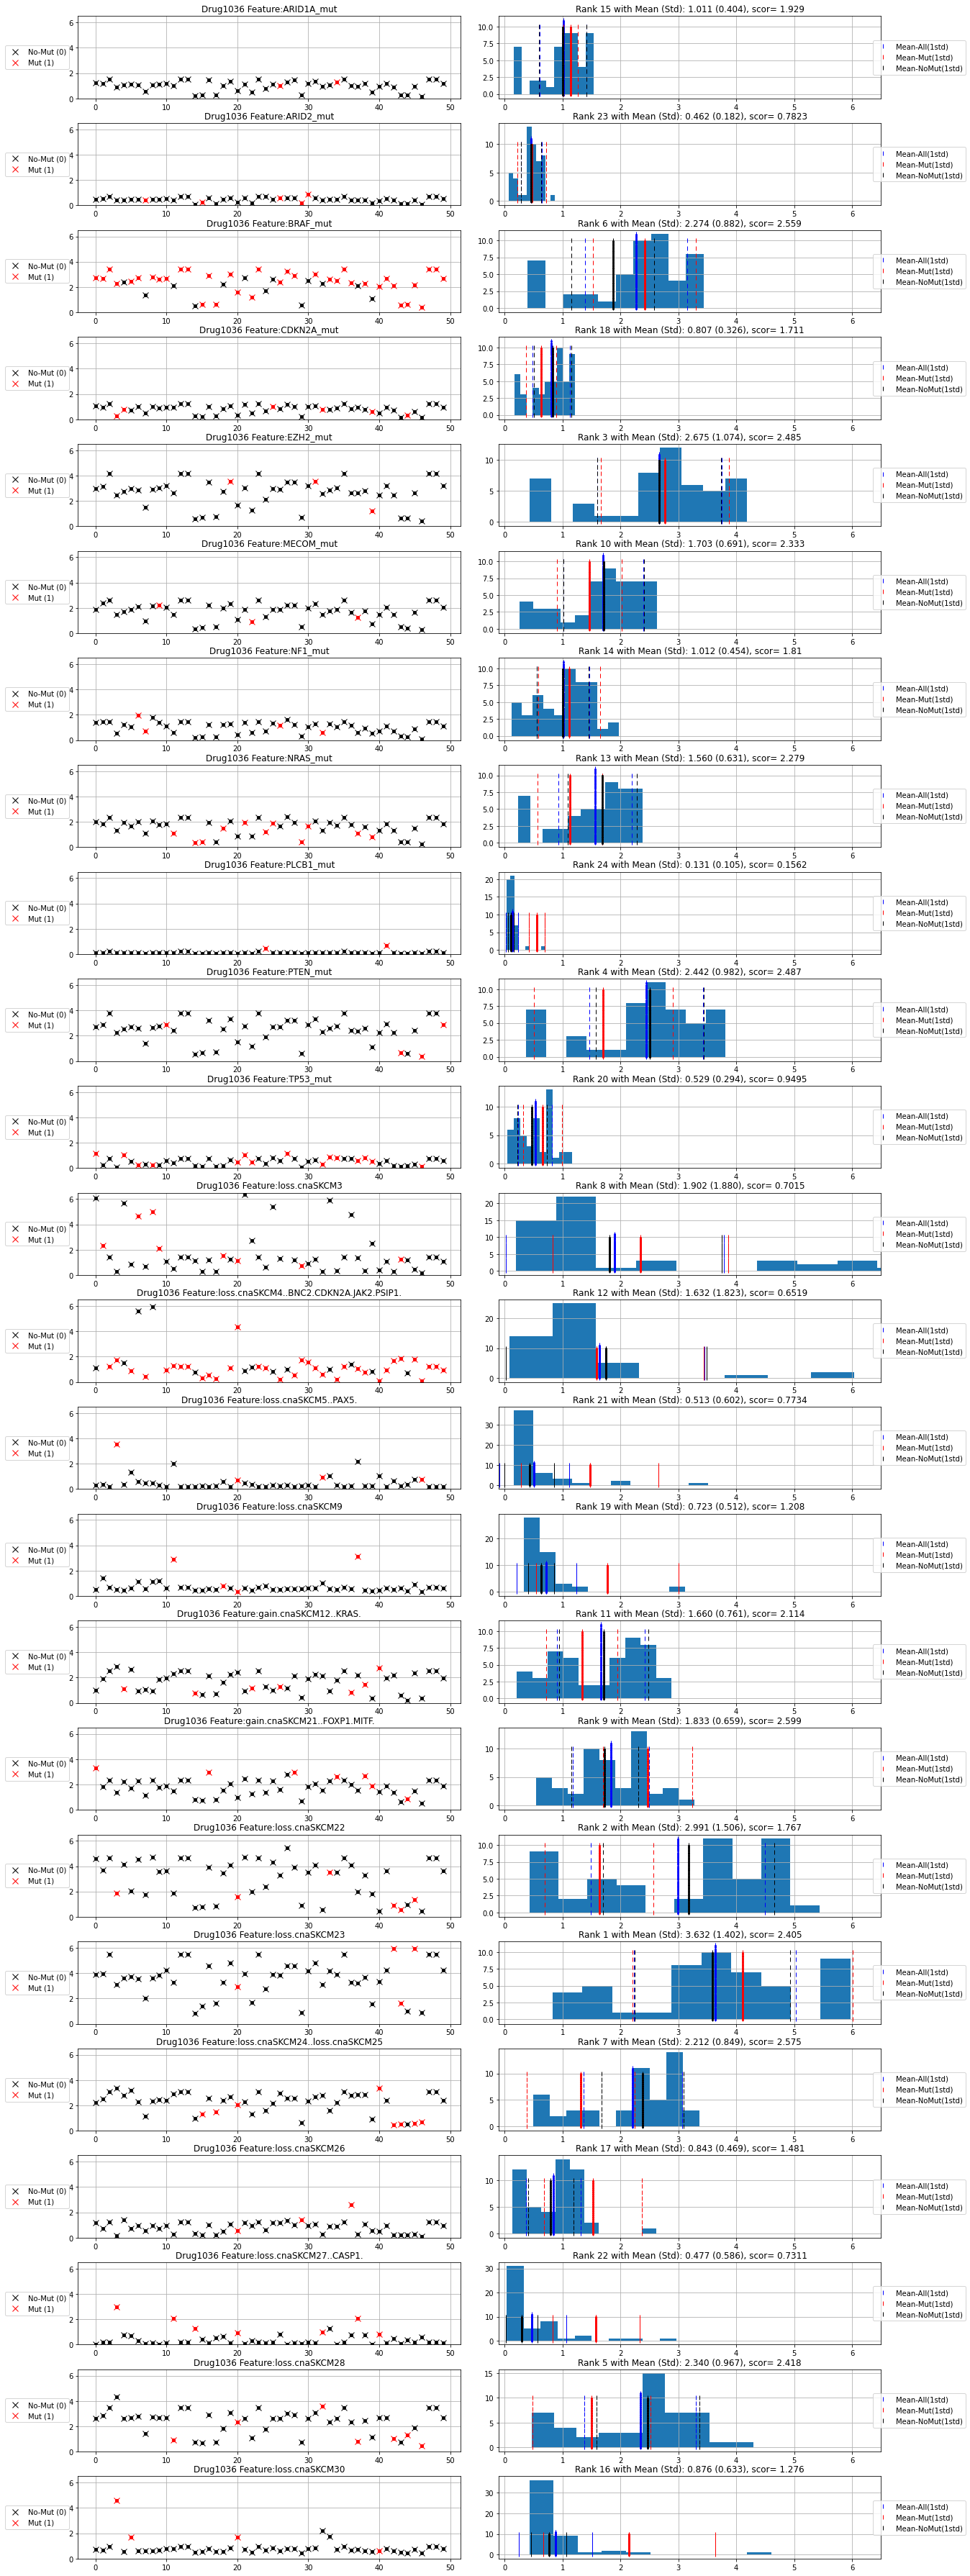

In [11]:
dict_rank = dict(zip(df_KL_Col_Names_Sorted_MOGP.columns,np.arange(0,24)))
#pos_ranking = df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[0:30]].min().copy()
#pos_ranking["ARID1A_mut"]
if drug_name == "1036":
    use_lim = 6.5
elif drug_name == "1061":
    use_lim = 7.5
elif drug_name == "1373":
    use_lim = 8.7
#KL_Relevance_MOGP.shape
fig, axs = plt.subplots(24, 2,figsize = (20,65))
for pth_feat in range(24):
    N_obser = np.linspace(0,N-1,N) 
    axs[pth_feat, 0].plot(N_obser[Xtrain[:,pth_feat]==0] , KL_Relevance_MOGP[Xtrain[:,pth_feat]==0,pth_feat],'x',color = 'black',markersize=8)
    axs[pth_feat, 0].plot(N_obser[Xtrain[:,pth_feat]==1] , KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat],'x',color = 'red',markersize=8.5)
    axs[pth_feat, 0].plot(N_obser[Xtrain[:,pth_feat]==0] , KL_Relevance_MOGP[Xtrain[:,pth_feat]==0,pth_feat],'.',color = 'black',markersize=8)
    axs[pth_feat, 0].plot(N_obser[Xtrain[:,pth_feat]==1] , KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat],'.',color = 'red',markersize=8.5)
    axs[pth_feat, 1].hist(KL_Relevance_MOGP[:,pth_feat],bins=10)
    axs[pth_feat, 1].set_xlim([-0.1,use_lim])
    axs[pth_feat, 0].set_ylim([0,use_lim])
    axs[pth_feat, 0].set_title(f"Drug{drug_name} Feature:{List_Names_Melanoma[pth_feat]}")
    axs[pth_feat, 0].grid()
    axs[pth_feat, 1].grid()
    
    Mean_all = np.mean(KL_Relevance_MOGP[:,pth_feat])
    Std_all = np.std(KL_Relevance_MOGP[:,pth_feat])
    Mean_one = np.mean(KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat])
    Std_one = np.std(KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat])
    Mean_zero = np.mean(KL_Relevance_MOGP[Xtrain[:,pth_feat]==0,pth_feat])
    Std_zero = np.std(KL_Relevance_MOGP[Xtrain[:,pth_feat]==0,pth_feat])
    Nlines = 50
    Nlinestd = 10
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_all,np.linspace(0,11,Nlines),'|',color="blue")
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_one,np.linspace(0,10,Nlines),'|',color="red")
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_zero,np.linspace(0,10,Nlines),'|',color="black")
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_all,np.linspace(0,11,Nlines)-0.1,'o',color="blue",markersize=2)
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_all+Std_all),np.linspace(0,10,Nlinestd),'|',color="blue")
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_all-Std_all),np.linspace(0,10,Nlinestd),'|',color="blue")
    
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_one,np.linspace(0,10,Nlines)-0.1,'o',color="red",markersize=2)
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_one+Std_one),np.linspace(0,10,Nlinestd),'|',color="red")
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_one-Std_one),np.linspace(0,10,Nlinestd),'|',color="red")
    
    axs[pth_feat, 1].plot(np.ones(Nlines)*Mean_zero,np.linspace(0,10,Nlines)-0.1,'o',color="black",markersize=2)
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_zero+Std_zero),np.linspace(0,10,Nlinestd),'|',color="black")
    axs[pth_feat, 1].plot(np.ones(Nlinestd)*(Mean_zero-Std_zero),np.linspace(0,10,Nlinestd),'|',color="black")
    
    #axs[pth_feat,1].set_title(f"Rank {dict_rank[List_Names_Melanoma[pth_feat]]+1} with Mean (Std): {Mean_all:.3f} ({Std_all:.3f})") 
    axs[pth_feat,1].set_title(f"Rank {dict_rank[List_Names_Melanoma[pth_feat]]+1} with Mean (Std): {Mean_all:.3f} ({Std_all:.3f}), scor= {(Mean_all+Mean_all*np.clip(np.log(1/(Std_all)),-Mean_all,1.5*Mean_all)):.4}")
    axs[pth_feat,0].legend(["No-Mut (0)","Mut (1)"],loc='center left', bbox_to_anchor=(-0.2, 0.5))
    axs[pth_feat,1].legend(["Mean-All(1std)","Mean-Mut(1std)","Mean-NoMut(1std)"],loc='center right', bbox_to_anchor=(1.23, 0.5))
    
#plt.subplots_adjust(left=0.1,bottom=0.1,right=0.8,top=0.9,wspace=0.4,hspace=0.4)
plt.subplots_adjust(left=None,bottom=None,right=None, top=None,wspace=0.1,hspace=0.3)

# Xtrain[:,pth_feat]
#print("Mean all: ", np.mean(KL_Relevance_MOGP[:,pth_feat]))
# print("std all: ", np.std(KL_Relevance_MOGP[:,pth_feat]))
# print("Mean: ", np.mean(KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat]))
# print("std: ", np.std(KL_Relevance_MOGP[Xtrain[:,pth_feat]==1,pth_feat]))

#plt.savefig("Histogram_KLRel_GDSC1_Drug"+drug_name+".pdf")

In [12]:
List_Names_Melanoma

['ARID1A_mut',
 'ARID2_mut',
 'BRAF_mut',
 'CDKN2A_mut',
 'EZH2_mut',
 'MECOM_mut',
 'NF1_mut',
 'NRAS_mut',
 'PLCB1_mut',
 'PTEN_mut',
 'TP53_mut',
 'loss.cnaSKCM3',
 'loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.',
 'loss.cnaSKCM5..PAX5.',
 'loss.cnaSKCM9',
 'gain.cnaSKCM12..KRAS.',
 'gain.cnaSKCM21..FOXP1.MITF.',
 'loss.cnaSKCM22',
 'loss.cnaSKCM23',
 'loss.cnaSKCM24..loss.cnaSKCM25',
 'loss.cnaSKCM26',
 'loss.cnaSKCM27..CASP1.',
 'loss.cnaSKCM28',
 'loss.cnaSKCM30']

In [13]:
athens = pd.DataFrame({
    'Men': [8.59, 8.47, 8.32, 8.31, 8.25, 8.24, 8.23, 8.21],
    'Women': [7.07, 7.05, 7.05, 6.96, 6.85, 6.83, 6.80, 6.73]
})
athens

,Men,Women
0,8.59,7.07
1,8.47,7.05
2,8.32,7.05
3,8.31,6.96
4,8.25,6.85
5,8.24,6.83
6,8.23,6.80
7,8.21,6.73


In [14]:
df_GD1_ToPred_GD2 = pd.DataFrame(df_sorted_MOGP[df_sorted_MOGP.columns[1:]].values.T,columns=List_Names_Melanoma)

In [15]:
if drug_name == "1036":
    which_MOGPmodel_GDSC2 = "m547" #The model trained on GDSC2_ToPred_GDSC1 #best: mXX; 
    N_GDSC1 = 40 #40

_FOLDER_KLRel_GDSC2 = _FOLDER = "/home/juanjo/Work_Postdoc/my_codes_postdoc/GPy_Models/Codes_For_GDSC2_ANOVA/"
Pfeatures = df_Feature_Names_Melanoma.shape[0]
df_KLRelevance_Mtx_MOGP_GDSC1 = pd.read_csv(_FOLDER_KLRel_GDSC2+'Best_Model_Drug'+drug_name+'_MelanomaGDSC2_GPy_ANOVA_ExactMOGP_ProdKern/Relevance_Drug'+drug_name+'_MelanomaGDSC2_ANOVA_ToPredict_MelanomaGDSC1_ExactMOGP_'+which_MOGPmodel_GDSC2+'.txt', names=["col"+str(i) for i in range(N_GDSC1+1)])

df_sorted_MOGP_GDSC1 = df_KLRelevance_Mtx_MOGP_GDSC1.sort_values(by=['col0'])

df_GD2_ToPred_GD1 = pd.DataFrame(df_sorted_MOGP_GDSC1[df_sorted_MOGP_GDSC1.columns[1:]].values.T,columns=List_Names_Melanoma)

In [49]:
"Organise dataset as per the maximum to minimum average between GD1 and GD2"
df_mean_GD1and2=(df_GD1_ToPred_GD2.mean(0)+df_GD2_ToPred_GD1.mean(0))/2
index_sort = df_mean_GD1and2_sorted.index[::-1]

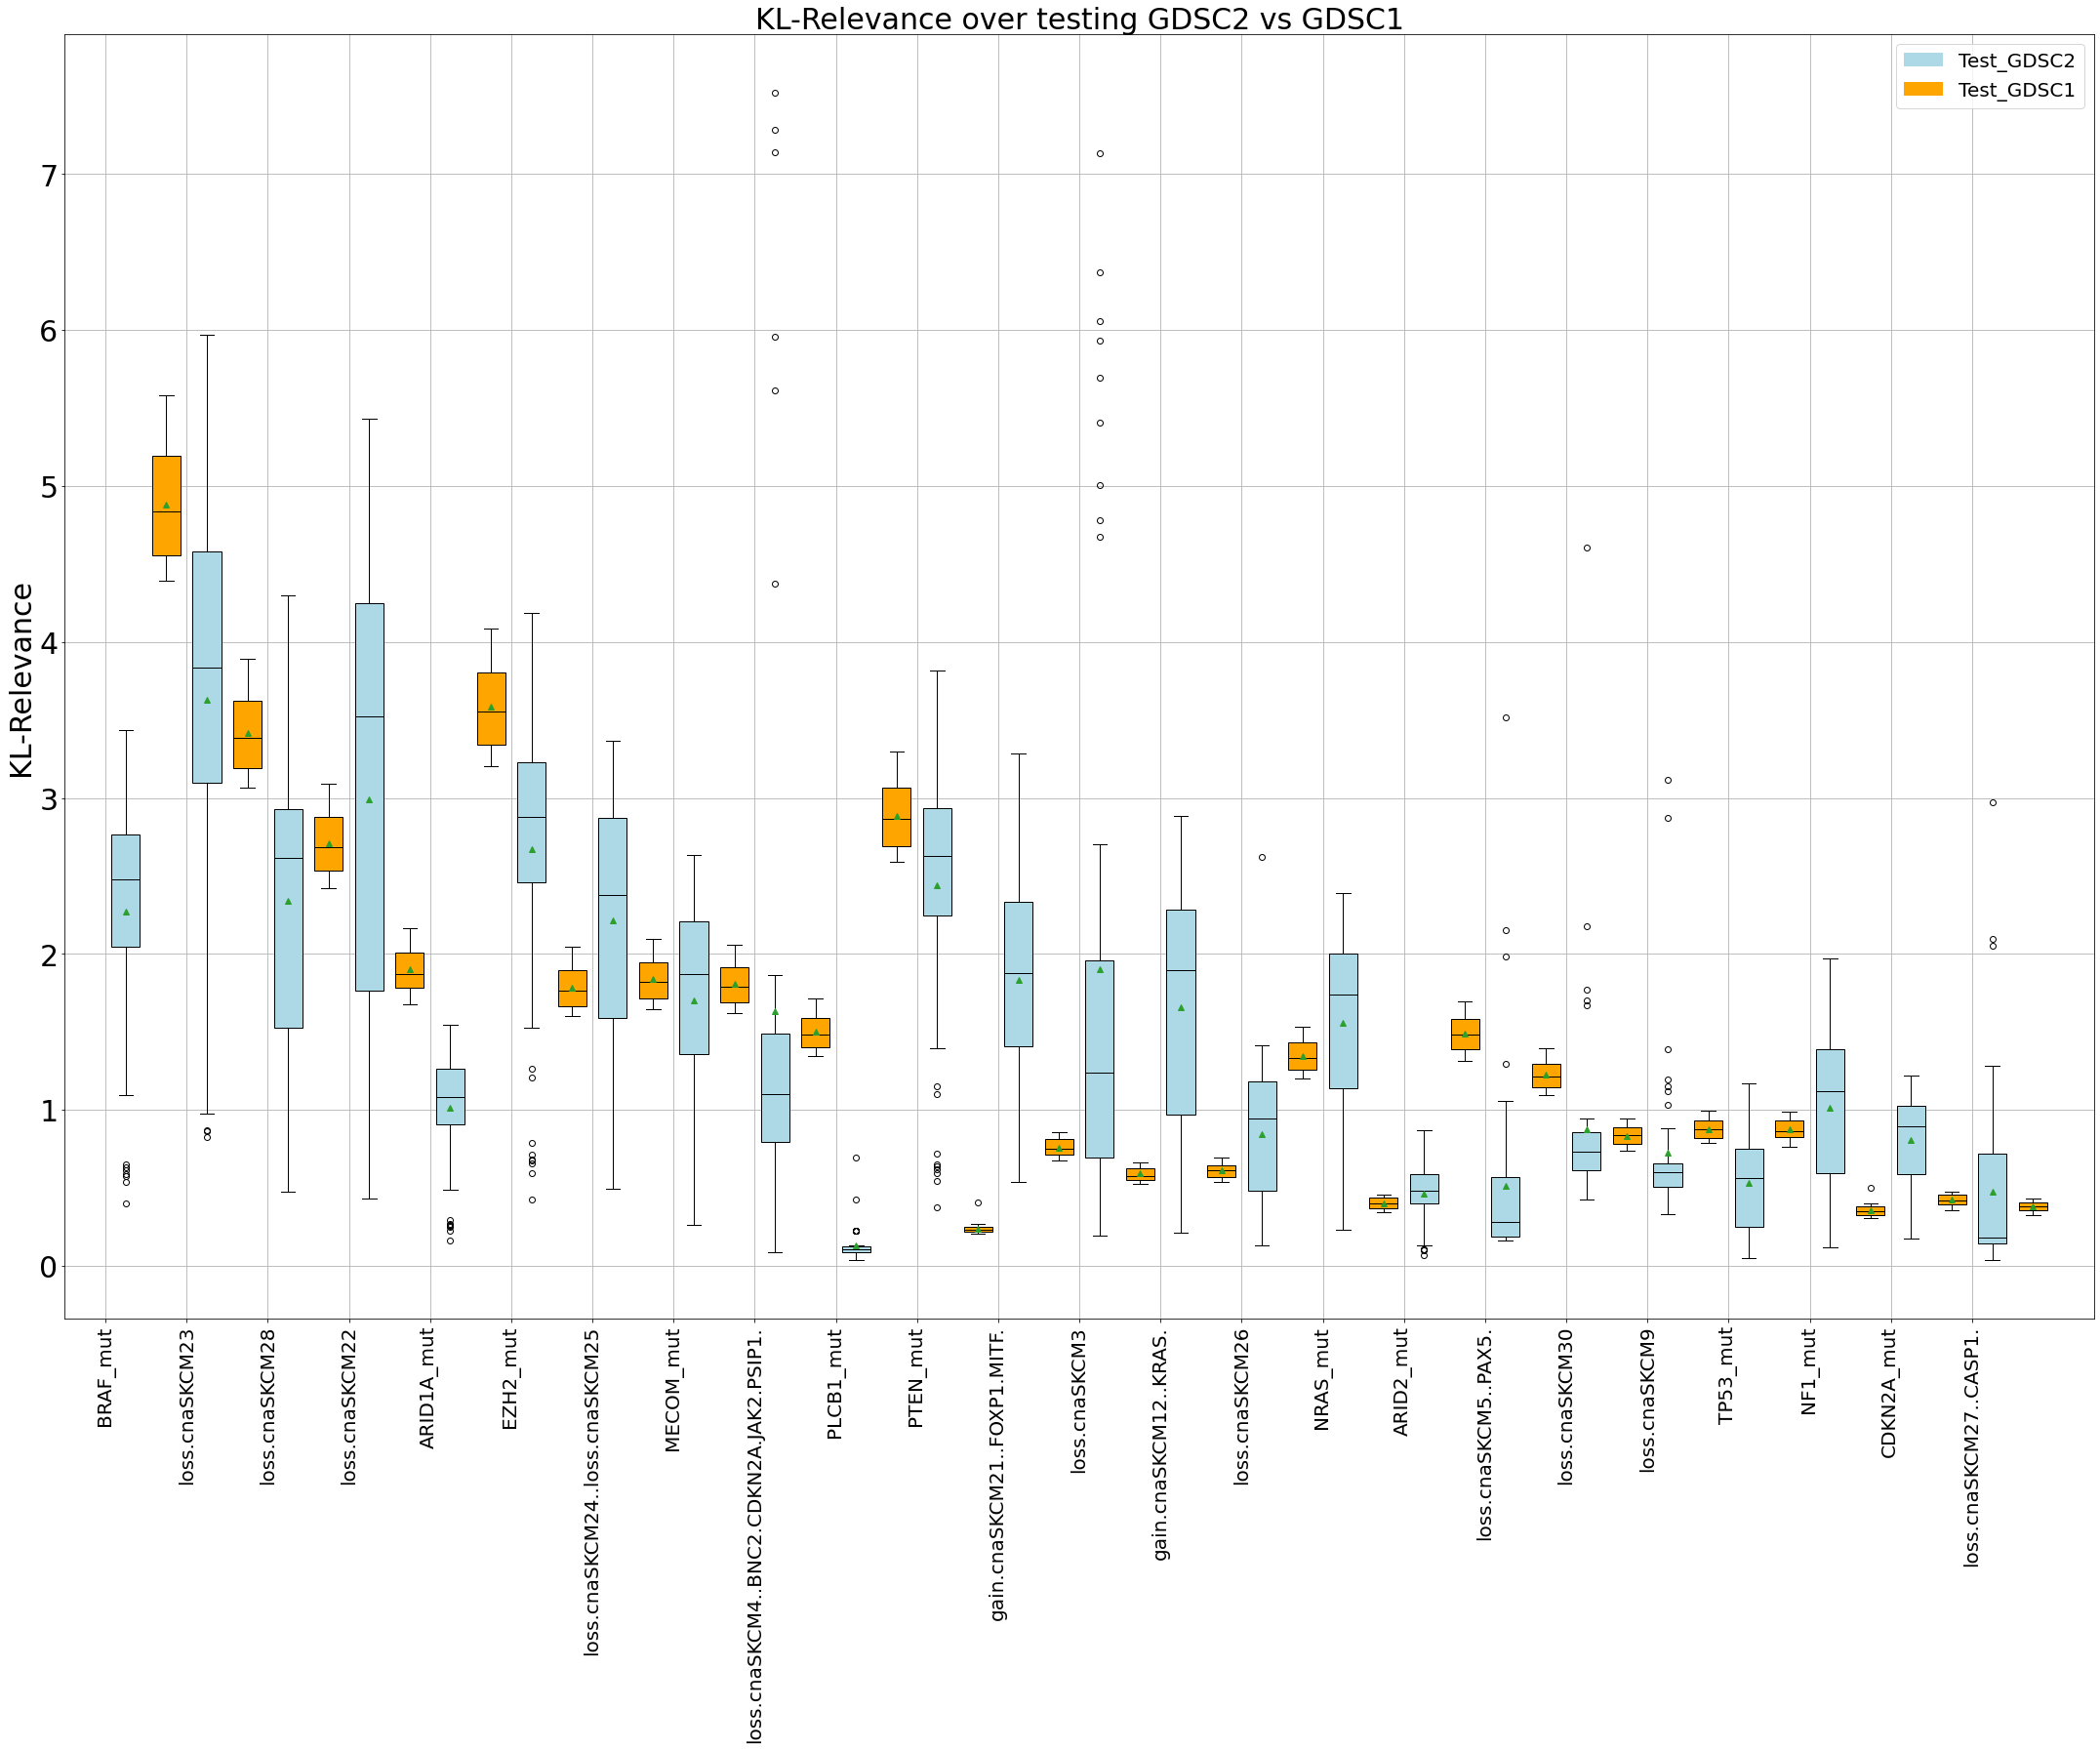

In [62]:
datasets = [df_GD1_ToPred_GD2[index_sort], df_GD2_ToPred_GD1[index_sort]]

# Define which colours you want to use
colours = ['lightblue', 'orange']

plt.figure(1,figsize=(30,25))
# Create the plot
ax = plt.axes()
# Set x-positions for boxes
x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
x_pos = (x_pos_range * 0.5) + 1.25
# Plot
for i, data in enumerate(datasets):
    bp = ax.boxplot(np.array(data), widths=0.7 / len(datasets),labels=list(datasets[0]), patch_artist=True,showmeans=True,positions=[x_pos[i] + j * 1 for j in range(len(data.T))]
        
    )
    # Fill the boxes with colours (requires patch_artist=True)
    k = i % len(colours)
    for box in bp['boxes']:
        box.set(facecolor=colours[k])
    # Make the median lines more visible
    plt.setp(bp['medians'], color='black')
    #plt.setp(bp['means'], color='black')

# Axis details
# details = ax.set(
#     title='KL-Relevance over testing GDSC2 vs GDSC1',
#     ylabel='KL-Relevance'
# )
ax.set_title('KL-Relevance over testing GDSC2 vs GDSC1',fontsize=30)
ax.set_ylabel('KL-Relevance',fontsize=30)
plt.xticks(rotation = 90,fontsize=20)
#ax.tick_params(axis='x', bottom=False)
xticks = ax.set_xticks(np.arange(len(list(datasets[0]))) + 1.0)
#xticks = ax.set_xticks(np.arange(len(list(datasets[0])) + 1) + 0.0, minor=True)
xlim = ax.set_xlim([0.5, len(list(datasets[0])) + 1.5])
plt.grid()
plt.yticks(fontsize=30)

groups = ['Test_GDSC2', 'Test_GDSC1']

from matplotlib.patches import Patch

# Legend
legend_elements = []
for i in range(len(datasets)):
    j = i % len(groups)
    k = i % len(colours)
    legend_elements.append(Patch(facecolor=colours[k], label=groups[j]))
ax.legend(handles=legend_elements, fontsize=20)
plt.tight_layout()

plt.savefig("KLRel_GDSC2_vs_GDSC1.pdf")

In [47]:
#np.abs(df_GD1_ToPred_GD2.mean(0)-df_GD2_ToPred_GD1.mean(0))

#df_sorted_MOGP[df_sorted_MOGP.columns[1:]]

Index(['BRAF_mut', 'loss.cnaSKCM23', 'loss.cnaSKCM28', 'loss.cnaSKCM22',
       'ARID1A_mut', 'EZH2_mut', 'loss.cnaSKCM24..loss.cnaSKCM25', 'MECOM_mut',
       'loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.', 'PLCB1_mut', 'PTEN_mut',
       'gain.cnaSKCM21..FOXP1.MITF.', 'loss.cnaSKCM3', 'gain.cnaSKCM12..KRAS.',
       'loss.cnaSKCM26', 'NRAS_mut', 'ARID2_mut', 'loss.cnaSKCM5..PAX5.',
       'loss.cnaSKCM30', 'loss.cnaSKCM9', 'TP53_mut', 'NF1_mut', 'CDKN2A_mut',
       'loss.cnaSKCM27..CASP1.'],
      dtype='object')
Index(['loss.cnaSKCM27..CASP1.', 'CDKN2A_mut', 'NF1_mut', 'TP53_mut',
       'loss.cnaSKCM9', 'loss.cnaSKCM30', 'loss.cnaSKCM5..PAX5.', 'ARID2_mut',
       'NRAS_mut', 'loss.cnaSKCM26', 'gain.cnaSKCM12..KRAS.', 'loss.cnaSKCM3',
       'gain.cnaSKCM21..FOXP1.MITF.', 'PTEN_mut', 'PLCB1_mut',
       'loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.', 'MECOM_mut',
       'loss.cnaSKCM24..loss.cnaSKCM25', 'EZH2_mut', 'ARID1A_mut',
       'loss.cnaSKCM22', 'loss.cnaSKCM28', 'loss.cnaSKCM23', 'BR

In [48]:
df_GD1_ToPred_GD2[df_mean_GD1and2_sorted.index[::-1]]

,BRAF_mut,loss.cnaSKCM23,loss.cnaSKCM28,loss.cnaSKCM22,ARID1A_mut,EZH2_mut,loss.cnaSKCM24..loss.cnaSKCM25,MECOM_mut,loss.cnaSKCM4..BNC2.CDKN2A.JAK2.PSIP1.,PLCB1_mut,...,loss.cnaSKCM26,NRAS_mut,ARID2_mut,loss.cnaSKCM5..PAX5.,loss.cnaSKCM30,loss.cnaSKCM9,TP53_mut,NF1_mut,CDKN2A_mut,loss.cnaSKCM27..CASP1.
0,2.75270,3.88100,2.59700,4.61460,1.25990,2.98350,2.20970,1.87240,1.120100,0.109680,...,1.18480,2.02810,0.484540,0.31094,0.70135,0.50024,1.170300,1.38530,1.03950,0.038254
1,2.67890,3.93730,2.82320,3.70230,1.16370,3.15010,2.50250,2.38430,7.520400,0.116590,...,0.74807,1.86380,0.507940,0.38330,0.68886,1.39000,0.256070,1.43760,0.92174,0.185220
2,3.43780,5.45950,3.48360,4.65710,1.54380,4.18340,3.06020,2.63400,1.245100,0.222340,...,1.23150,2.35720,0.683280,0.18554,0.94363,0.65912,0.751380,1.44730,1.21970,0.178090
3,2.25430,3.09010,4.30060,1.88650,0.90741,2.45680,3.36590,1.49010,1.759300,0.088971,...,0.18540,1.32090,0.396020,3.51900,4.60560,0.50390,0.048607,0.54847,0.28629,2.971400
4,2.39550,3.60180,2.60750,4.12380,1.06130,2.76870,2.79740,1.72990,1.527500,0.101800,...,1.41650,1.93900,0.431480,0.37395,0.54798,0.46340,1.016300,1.22550,0.78553,0.780380
5,2.46540,3.74600,2.68670,2.02810,1.10700,2.99710,3.19160,1.88890,0.887790,0.110050,...,0.71125,1.69020,0.483110,1.29640,1.67110,0.63812,0.517770,1.03840,0.69533,0.734100
6,2.71740,3.52970,2.79340,4.56730,1.06830,2.84130,2.27780,2.09040,5.611000,0.104720,...,0.93272,2.00980,0.457900,0.59958,0.61103,1.12240,0.238740,1.97180,0.98934,0.301350
7,1.35760,2.02630,1.44420,1.74070,0.58009,1.52660,1.16270,0.95964,0.438200,0.075928,...,0.57296,1.09660,0.428750,0.49369,0.63878,0.54367,0.279230,0.74642,0.48710,0.097601
8,2.76990,3.62160,2.71690,4.68620,1.09230,2.91520,2.33710,2.14510,5.954100,0.107540,...,0.95745,2.06200,0.474440,0.46473,0.62790,1.15220,0.244300,1.80490,0.99694,0.158200
9,2.59110,3.82050,2.67020,3.59250,1.12940,3.05690,2.42700,2.22310,7.281600,0.112830,...,0.72633,1.80050,0.492880,0.30410,0.66651,1.19620,0.251380,1.39440,0.89461,0.035809


In [ ]:
list(datasets[0])

Text(0.5, 1.0, 'KL-Relevance of GDSC2 computed using a MOGP trained on GDSC1 (Drug-1036)')

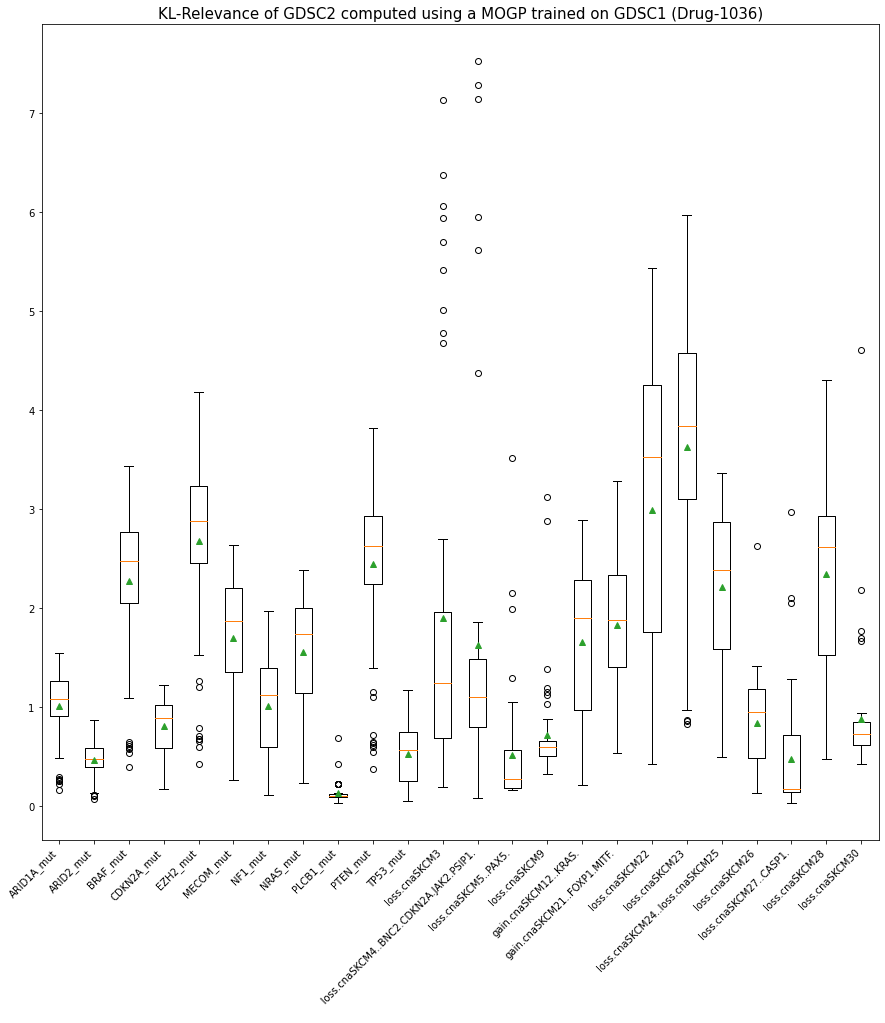

In [184]:
plt.figure(1,figsize=(15,15))
plt.boxplot(KL_Relevance_MOGP,showmeans=True)#,meanline=True)
plt.xticks(np.arange(1,25), List_Names_Melanoma)
plt.xticks(rotation = 45,ha='right')
plt.xticks(fontsize=10)
plt.title("KL-Relevance of GDSC2 computed using a MOGP trained on GDSC1 (Drug-1036)",fontsize=15)
#plt.boxplot?
#plt.savefig("Boxplot_KLRel"+drug_name+"_GDSC1_ToPredict_GDSC2.pdf")

CDKN2A_mut
NF1_mut
loss.cnaSKCM5..PAX5.


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 13 and the array at index 1 has size 8

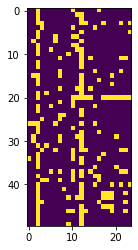

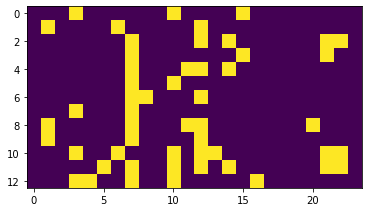

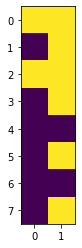

In [14]:
#Xtrain[Xtrain[:,2]==0,:].shape
plt.figure(0)
plt.imshow(Xtrain)
plt.figure(1)
plt.imshow(Xtrain[Xtrain[:,2]==0,:])
if_IC50 = np.array([1,0,1,0,0,0,0,0])[:,None]
if_IC50high = np.array([1,0,1,0,0,0,0,0])
if_less65 = np.array([1,1,1,1,0,1,0,1])[:,None]
plt.figure(2)
plt.imshow(np.concatenate((if_IC50,if_less65),1))
print(List_Names_Melanoma[3])
print(List_Names_Melanoma[6])
print(List_Names_Melanoma[13])

if drug_name == "1036":
    X_BRAF0 = Xtrain[Xtrain[:,2]==0,:].copy()
    X_new = []
    X_new = np.concatenate((X_BRAF0,if_IC50),1)
    X_new = np.concatenate((X_new,if_less65),1)
    print("rank:", np.linalg.matrix_rank(Xtrain))
    X_new.shape

In [ ]:
import scipy
mycorr_feat=np.clip(np.abs(np.corrcoef(Xtrain.T)),0.5,1.0)
#mycorr_feat=np.clip(np.abs(np.corrcoef(X_new.T)),0.4,1.0)
plt.imshow(mycorr_feat)
print("corr, pval:",scipy.stats.pearsonr(X_BRAF0[:,23],if_less65.flatten()))
if_IC50

In [ ]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names_MOGP[df_KLR_With_Column_Names_MOGP.columns[0:19]]

In [ ]:
#Top 30 most important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[0:30]].min()

In [ ]:
#Top 30 least important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[-30:]].min()

### Check for BRAF ranking position

In [10]:
np.where(df_KL_Col_Names_Sorted_MOGP.columns=="BRAF_mut")

(array([0]),)

# Analysis for SOGP when training over IC50

(345, 419)


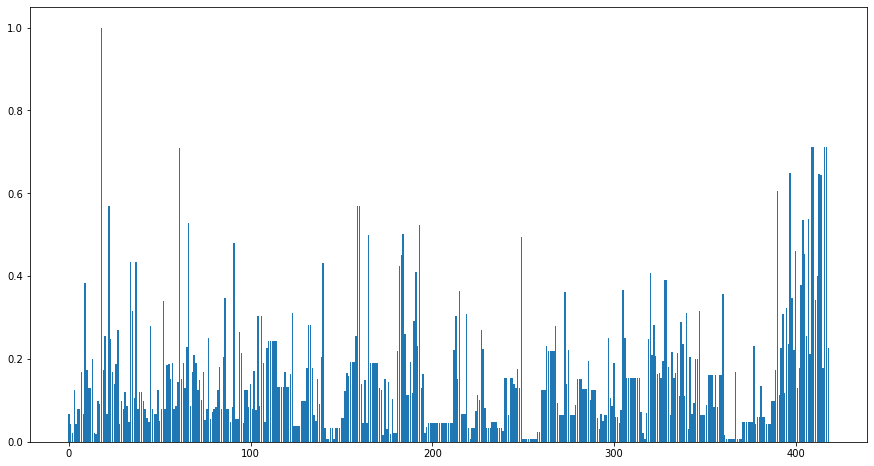

In [32]:
which_model = "m3_Delta_e-5"   #best: m3; second-best: mXX
N = 345
Pfeatures = df_Feature_Names_Melanoma.shape[0]
#df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_MelanomaGDSC2_SOGP_IC50/Relevance_MelanomaGDSC2_SOGP_IC50.txt', names=["col"+str(i) for i in range(N+1)])
df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_MelanomaGDSC2_GPy_SOGP_IC50/Relevance_MelanomaGDSC2_SOGP_IC50_'+which_model+'.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted = df_KLRelevance_Mtx.sort_values(by=['col0'])
KL_Relevance = df_sorted.values
KL_Relevance = KL_Relevance[:,1:].T  #We getrid of first index position
print(KL_Relevance.shape)
KL_p = np.mean(KL_Relevance,0)
plt.figure(figsize = (15,8))
plt.bar(np.arange(0,Pfeatures),KL_p/KL_p.max())

df_KLR_With_Column_Names = pd.DataFrame(KL_p[None,:]/KL_p.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted = df_KLR_With_Column_Names.sort_values(by= 0,axis=1,ascending = False)

In [33]:
#Pfeatures
#KL_p/KL_p.max()
#df_sorted
#df_sorted
#df_KLRelevance_Mtx
#df_sorted["col0"].values == np.arange(0,419)
#df_sorted["col0"].values
# check_pos = np.arange(0,419)
# for i in range(419):
#     if df_sorted["col0"].values[i]==check_pos[i]: 
#         print(i)

In [34]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names[df_KLR_With_Column_Names.columns[0:19]]

,AFF4_mut,AHCTF1_mut,AKAP9_mut,ANK3_mut,APC_mut,ARFGAP3_mut,ARHGAP29_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ARID4A_mut,ASPM_mut,ASXL2_mut,ATM_mut,B2M_mut,BAP1_mut,BAZ2B_mut,BPTF_mut,BRAF_mut
0,0.066411,0.042899,0.021692,0.124961,0.04401,0.079601,0.079601,0.169578,0.066411,0.383955,0.173125,0.130726,0.130726,0.199468,0.021692,0.018339,0.097957,0.091634,1.0


In [35]:
#Top 30 most important features out of 419 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[0:32]].min()

BRAF_mut                                      1.000000
bond_stereo_count                             0.712680
rotatable_bond_count                          0.712680
F                                             0.712680
S                                             0.712680
NRAS_mut                                      0.710147
chr17:46691520-46692097(HOXB8)_HypMET         0.648979
surface_area                                  0.645993
h_bond_acceptor_count                         0.645208
chr10:93392667-93393147(PPP1R3C)_HypMET       0.605594
loss:cnaPANCAN82                              0.570428
loss:cnaPANCAN81                              0.570428
CDKN2A_mut                                    0.568784
complexity                                    0.538977
chr22:24384134-24384405(GSTT1)_HypMET         0.536291
PLCB1_mut                                     0.528668
loss:cnaPANCAN144 (BNC2,CDKN2A,JAK2,PSIP1)    0.524488
gain:cnaPANCAN123                             0.501090
loss:cnaPA

In [36]:
#Top 30 least important features out of 385 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[-50:]].min()

loss:cnaPANCAN66                 0.033436
loss:cnaPANCAN67                 0.033436
loss:cnaPANCAN195                0.033436
loss:cnaPANCAN194 (FGFR3)        0.033436
loss:cnaPANCAN193                0.033436
loss:cnaPANCAN174                0.033436
loss:cnaPANCAN173                0.033436
loss:cnaPANCAN171                0.033436
loss:cnaPANCAN199                0.033436
loss:cnaPANCAN200                0.033436
loss:cnaPANCAN201                0.033436
loss:cnaPANCAN70                 0.033436
loss:cnaPANCAN63                 0.033436
loss:cnaPANCAN263                0.030468
loss:cnaPANCAN368                0.030452
loss:cnaPANCAN110                0.030108
loss:cnaPANCAN202                0.026106
loss:cnaPANCAN225                0.024052
loss:cnaPANCAN226                0.024052
loss:cnaPANCAN147                0.021692
AKAP9_mut                        0.021692
B2M_mut                          0.021692
loss:cnaPANCAN313                0.021325
loss:cnaPANCAN118 (ZFHX3)        0

### Check for BRAF ranking position for SOGP_IC50

In [36]:
np.where(df_KL_Col_Names_Sorted.columns=="BRAF_mut")

(array([0]),)

In [66]:
List_Names_Melanoma

['AFF4_mut',
 'AHCTF1_mut',
 'AKAP9_mut',
 'ANK3_mut',
 'APC_mut',
 'ARFGAP3_mut',
 'ARHGAP29_mut',
 'ARID1A_mut',
 'ARID1B_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ASPM_mut',
 'ASXL2_mut',
 'ATM_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'CDC27_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHEK2_mut',
 'CLASP2_mut',
 'CLSPN_mut',
 'CREBBP_mut',
 'CTCF_mut',
 'CTNNB1_mut',
 'CUL2_mut',
 'CUX1_mut',
 'DHX15_mut',
 'ELF1_mut',
 'EP300_mut',
 'EZH2_mut',
 'FAM123B_mut',
 'FGFR2_mut',
 'GNA11_mut',
 'HDAC9_mut',
 'HRAS_mut',
 'INPP4A_mut',
 'INPPL1_mut',
 'KDM6A_mut',
 'LAMA2_mut',
 'LPHN2_mut',
 'LRP6_mut',
 'MACF1_mut',
 'MAGI2_mut',
 'MAP2K1_mut',
 'MAP3K4_mut',
 'MCM8_mut',
 'MECOM_mut',
 'MGA_mut',
 'MLL2_mut',
 'MLL3_mut',
 'MYH11_mut',
 'MYH14_mut',
 'MYH9_mut',
 'NCOR1_mut',
 'NF1_mut',
 'NRAS_mut',
 'PABPC3_mut',
 'PCDH18_mut',
 'PHLPP1_mut',
 'PIK3R1_mut',
 'PLCB1_mut',
 'PLXNA1_mut',
 'PSIP1_mut',
 'PTEN_mut',
 'RAC1_mut',
 'RB1_mut',